# TP REGRESSION LINEARE

### Import des librairies utiles au TP

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import scipy.stats as stats
from decimal import Decimal
from sklearn import linear_model
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


### Exercice 1 : Analyse de la base de données "investment data"

##### Question 1

In [17]:
#Import de la base de donnée depuis internet
df_invest=pd.read_csv("https://bitbucket.org/portierf/shared_files/downloads/invest.txt", sep = " ")

#On affiche les 5 premières colonnes
df_invest.head()

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50


##### Question 2

<IPython.core.display.Javascript object>


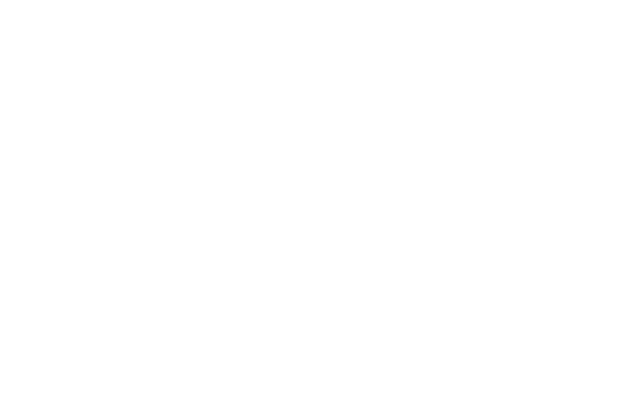

<IPython.core.display.Javascript object>


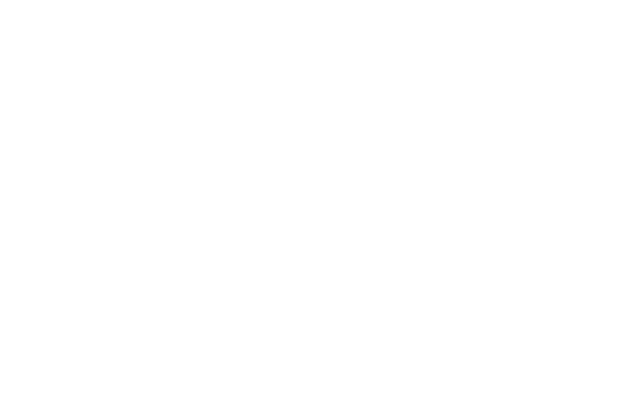

In [18]:
#On prépare nos séries de données à ploter
y=df_invest["invest"]
X=df_invest["gnp"]

#On prépare le graph normal
plt.figure(11,figsize=(8,5))
plt.plot(X,y,"rx")
plt.title("Investment per GNP", fontsize = 12)
plt.xlabel("Gross Nationnal Product")
plt.ylabel("Investment")


#On passe à l'échelle logarithmique
y_log = np.log(y)
X_log = np.log(X)
plt.figure(22,figsize=(8,5))
plt.plot(X_log,y_log,"rx")
plt.title("Investment per GNP (Log scale)", fontsize = 12)
plt.xlabel("log Gross Nationnal Product")
plt.ylabel("log Investment")

plt.show()


#### Question 3

In [19]:
#On suppose pour la suite qu'on ne travaille qu'avec les valeurs logarithmique, on renomme X et y en fonction
X = X_log
y = y_log

#n est le nombre d'échantillon
n = X.count()

#Calcul de la moyenne de X et de Y
mean_X = X.sum()/n
mean_y = y.sum()/n

#Calcul de la variance de X et y, puis de l'ecart type
var_X = (((X-mean_X)**2).sum())/(n-1)
var_y = (((y-mean_y)**2).sum())/(n-1)

std_X = np.sqrt(var_X)
std_y = np.sqrt(var_y)

#On calcul aussi la covariance de X et y
cov_X_y = (((X-mean_X)*(y-mean_y)).sum())/(n-1)


ones = np.ones(n).reshape(n,1)
Xt_mat = X.values.reshape(n,1)
X_mat = np.concatenate([ones,Xt_mat],axis=1)

#On passe en matriciel
Y=y.values
Gram = X_mat.transpose().dot(X_mat)
inv_Gram = np.linalg.inv(Gram)

b= inv_Gram.dot(X_mat.transpose().dot(Y))

#On peut alors calculer nos prédictions Y_est
Y_est = X_mat.dot(b)


#On ajoute Y_est à notre df
df_invest["invest_predic"]=Y_est
y_est=df_invest["invest_predic"]

#On peut maintenant calculer l'erreur total
err = ((y-y_est)**2).sum()

#On en déduit le coefficient de détermination
R2 = ((y_est-mean_y)**2).sum()/((y-mean_y)**2).sum()

#On calcul la covariance de notre vecteur b=[b0,b1]

#On calcul l'estimateur de l'erreur eps:
var_eps_est = err/(n-2)

#On peut alors calculer la matrice de covariance de b:
cov_b = np.linalg.inv(Gram)*var_eps_est

#Il ne reste plus qu'à afficher nos résultats :
print(f"Intercept                   b0       : {round(b[0],2)}")
print(f"Pente                       b1       :  {round(b[1],2)}")
print(f"Standard Dev. Intercept     std(b0)  :  {round(np.sqrt(cov_b[0,0]),2)}")
print(f"Standard Dev. Pente         std(b1)  :  {round(cov_b[1,1],4)}")
print(f"Coeff. de determination     R2       :  {round(R2,3)}")

Intercept                   b0       : -1.96
Pente                       b1       :  1.02
Standard Dev. Intercept     std(b0)  :  0.41
Standard Dev. Pente         std(b1)  :  0.0031
Coeff. de determination     R2       :  0.963


<IPython.core.display.Javascript object>


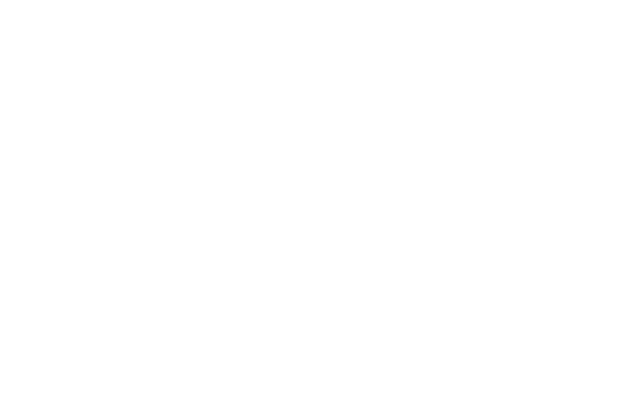

In [20]:
#On peut également tracer notre régression linéaire pour une meilleure visualisation
plt.figure(figsize=(8,5))
plt.plot(X,y,"rx")
plt.plot(X_log,y_est)
plt.title("Investment per GNP (Log scale)", fontsize = 12)
plt.xlabel("log Gross Nationnal Product")
plt.ylabel("log Investment")

plt.show()

#### Question 4

In [21]:
## On suppose que le paramètre b1 = 0, on construit alors notre statistique de test
T1 = b[1]/np.sqrt(cov_b[1,1])

#On modélise la loi de student de rang n-2 et on calcul la p-value
p = 2*(1-stats.t.cdf(T1,df=n-2))

print(f'Notre statistique de test T1 vaut : {round(T1,2)}')
print(f'p-value : {"%.0E" % p}')


Notre statistique de test T1 vaut : 18.33
p-value : 1E-10


#### Question 5

In [22]:
##Estimation de la prédiction du modèle pour GPA = 1000

#Nouveau paramètre GPN
x_new = np.log(1000)

#En matriciel, avec le vecteur constant :
X_new = np.matrix([[1],[x_new]])

#On en déduit y
y_new = b[0] + x_new*b[1]
print(f'Investment = {round(np.exp(y_new))} $ pour GNP = 1000')

#On peut calculer les intervalles de confiance à 90% pour notre prédiction:
#-par rapport au modèle réel
#-par rapport à la vrai valeur qu'aurait y pour GNP = 1000
conf = 0.90
a=1-(1-conf)/2
#Calcul du quantille a de notre loi de Student :
Q55= stats.t.ppf(a,n-2)

#On en déduit les bornes de notre intervalle de confiance CI :
CI_inf = round(float(X_new.reshape(1,2).dot(b)
                     -Q55*np.sqrt(X_new.reshape(1,2)*(inv_Gram)*X_new)*np.sqrt(var_eps_est)),2)
CI_sup = round(float(X_new.reshape(1,2).dot(b)
                     +Q55*np.sqrt(X_new.reshape(1,2)*(inv_Gram)*X_new)*np.sqrt(var_eps_est)),2)

#On réalise le même calcul pour l'intervalle de confiance face à la valeur réel :
PI_inf = round(float(X_new.reshape(1,2).dot(b)
                     -Q55*np.sqrt(1+X_new.reshape(1,2)*(inv_Gram)*X_new)*np.sqrt(var_eps_est)),2)
            
PI_sup = round(float(X_new.reshape(1,2).dot(b)
                     +Q55*np.sqrt(1+X_new.reshape(1,2)*(inv_Gram)*X_new)*np.sqrt(var_eps_est)),2)

print(f"Intervalle de confiance à {conf*100}% de notre prédiction face au modèle réel :     [{CI_inf} , {CI_sup}]")
print(f"Intervalle de confiance à {conf*100}% de notre prédiction face à sa valeur réelle : [{PI_inf} , {PI_sup}]")



Investment = 156.0 $ pour GNP = 1000
Intervalle de confiance à 90.0% de notre prédiction face au modèle réel :     [4.99 , 5.11]
Intervalle de confiance à 90.0% de notre prédiction face à sa valeur réelle : [4.88 , 5.22]


#### Question 6

<IPython.core.display.Javascript object>


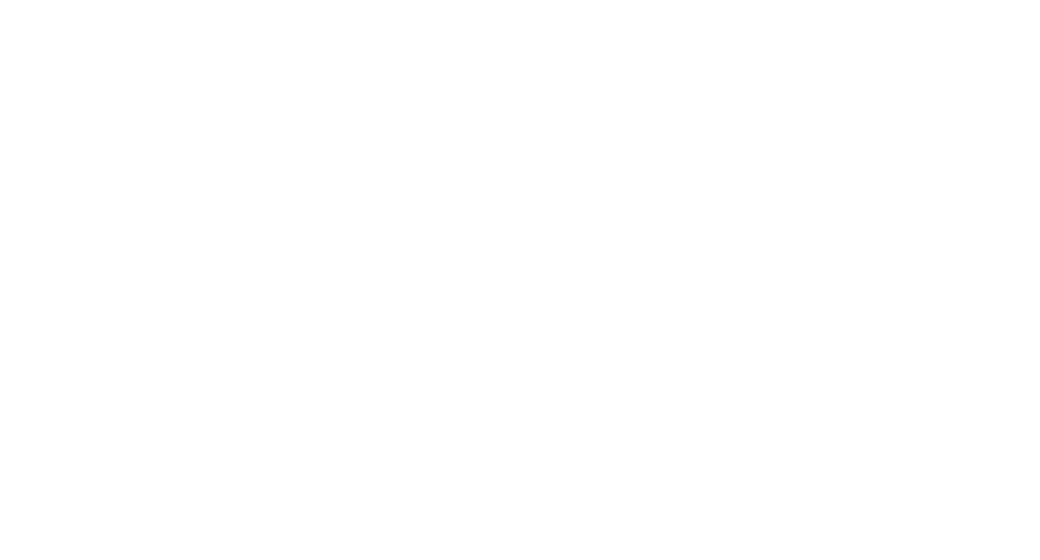

array([[1.        , 6.77239364],
       [1.        , 6.85012617],
       [1.        , 6.9004285 ],
       [1.        , 6.98249163],
       [1.        , 7.07825726],
       [1.        , 7.19022378],
       [1.        , 7.26836248],
       [1.        , 7.34549395],
       [1.        , 7.4489161 ],
       [1.        , 7.55919466],
       [1.        , 7.67966743],
       [1.        , 7.79061331],
       [1.        , 7.87591714],
       [1.        , 7.98538224],
       [1.        , 8.02535287]])

In [23]:
#On calcul le vecteur interval de fonction pour chacun de nos x
born_est = Q55*np.sqrt(np.sum(X_mat.dot(inv_Gram)*X_mat,axis=1).reshape(n,1))*np.sqrt(var_eps_est)
born_val = Q55*np.sqrt(1+np.sum(X_mat.dot(inv_Gram)*X_mat,axis=1).reshape(n,1))*np.sqrt(var_eps_est)
all_CI_inf = X_mat.dot(b).reshape(n,1)-born_est
all_CI_sup = X_mat.dot(b).reshape(n,1)+born_est

all_PI_inf = X_mat.dot(b).reshape(n,1)-born_val
all_PI_sup = X_mat.dot(b).reshape(n,1)+born_val

#On peut également tracer notre régression linéaire pour une meilleure visualisation
plt.figure(figsize=(13,7))
plt.plot(X,y,"rx")
plt.plot(x_new,y_new,"ro")
plt.plot(X_log,y_est,'b')
plt.plot(X_log,all_CI_inf,'g')
plt.plot(X_log,all_PI_sup,'black')
plt.plot(X_log,all_CI_sup,'g')
plt.plot(X_log,all_PI_inf,'black')
plt.title("Investment per GNP (Log scale)", fontsize = 15)
plt.xlabel("log Gross Nationnal Product")
plt.ylabel("log Investment")
plt.legend(("Investment réel","Valeur prédite","Droite de régression",'Intervalle CI','Intervalle PI'))
plt.show()

X_mat

#### Question 7

In [24]:
#On utilise maintenant la librairie Sklearn pour établir notre modèle linéaire
model=linear_model.LinearRegression(fit_intercept=False).fit(X_mat,y)
y_model_pred=model.predict(X_new.reshape(1,2))[0]
print('       | Modele construit  |  Sklearn  |')
print('-----------------------------------')
print(f"b0     |      {round(b[0],2)}        |  {round(model.coef_[0],2)}    |")
print(f"b1     |       {round(b[1],2)}        |   {round(model.coef_[1],2)}    |")
print(f"R2     |       {round(R2,3)}       |   {round(model.score(X_mat,y),3)}   |")
print(f"y_pred |       {round(y_new,2)}        |   {round(y_model_pred,2)}    |")
print("\n On est très content de constater que les résultats sont similaires !")


       | Modele construit  |  Sklearn  |
-----------------------------------
b0     |      -1.96        |  -1.96    |
b1     |       1.02        |   1.02    |
R2     |       0.963       |   0.963   |
y_pred |       5.05        |   5.05    |

 On est très content de constater que les résultats sont similaires !


#### Question 8

<IPython.core.display.Javascript object>


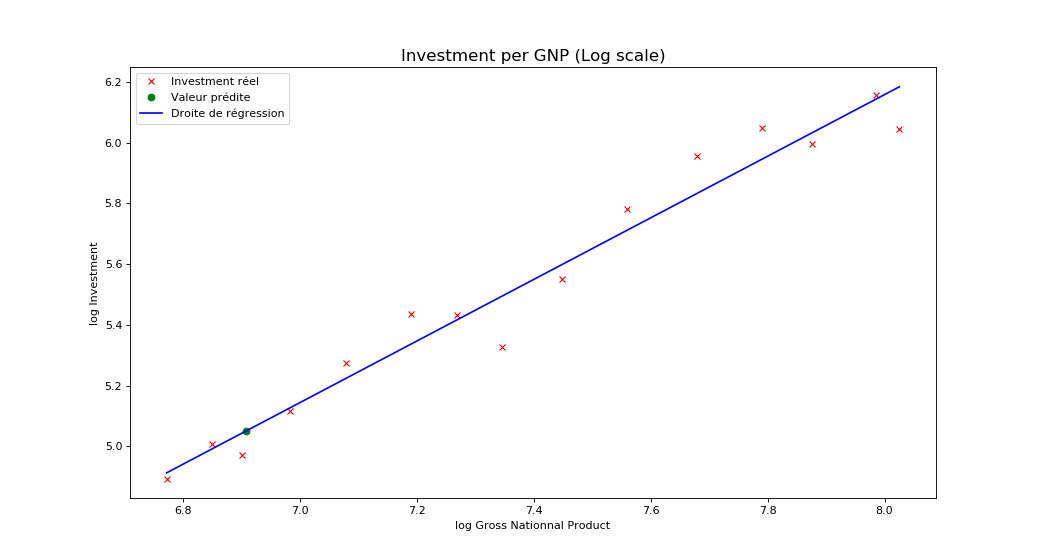

On est très content de voir le résultat similaire à notre modèle maison !


In [25]:
#On reprend notre graph, on change juste la couleur du point prédit...
#On peut également tracer notre régression linéaire pour une meilleure visualisation
plt.figure(figsize=(13,7))
plt.plot(X,y,"rx")
plt.plot(x_new,y_model_pred,"go")
plt.plot(X_log,model.predict(X_mat),'b')
plt.title("Investment per GNP (Log scale)", fontsize = 15)
plt.xlabel("log Gross Nationnal Product")
plt.ylabel("log Investment")
plt.legend(("Investment réel","Valeur prédite","Droite de régression"))
plt.show()

print("On est très content de voir le résultat similaire à notre modèle maison !")

#### Question 9  

In [26]:
#On ajoute la variable interest à notre matrice X
param_invest = df_invest["interest"]
X_mat2=np.concatenate([X_mat,param_invest.values.reshape(n,1)],axis=1)

#On calcul la matrice de Gram Xt*X
Gram2 = X_mat2.transpose().dot(X_mat2)
inv_Gram2 = np.linalg.inv(Gram2)

#On calcul le rang de notre matrice de Gram
rank_Gram2=np.linalg.matrix_rank(Gram2)
print(f"Le rang de la matrice de Gram est : {rank_Gram2}")
print(f"La matrice est donc de rang plein")
print(f"Attention cependant, car l'une des valeurs propre est très faible, ce qui peut laisser entendre une dépendance linéaire entre nos variables")


Le rang de la matrice de Gram est : 3
La matrice est donc de rang plein
Attention cependant, car l'une des valeurs propre est très faible, ce qui peut laisser entendre une dépendance linéaire entre nos variables


#### Question 10

In [30]:
#Calculons la nouvelle matrice B associé à nos deux paramètres, on la nomme b2
b2 = inv_Gram2.dot(X_mat2.transpose().dot(y_log))


#On calcul R2
new_y_est = np.sum(X_mat2.dot(b2.reshape(3,1)),axis=1)

#On peut maintenant calculer l'erreur total
err2 = ((y-new_y_est)**2).sum()

#On calcul l'estimateur de l'erreur eps, qui change car rg(X) est différent:
var_eps_est2 = err2/(n-3)

#On peut alors calculer la matrice de covariance de b:
cov_b2 = np.linalg.inv(Gram2)*var_eps_est2

#On obtient alors les valeurs des estimateurs et leurs écarts type :
b2_0 = b2[0]
b2_1 = b2[1]
b2_2 = b2[2]
var_b2_0 = np.sqrt(cov_b2[0,0])
var_b2_1 = np.sqrt(cov_b2[1,1])
var_b2_2 = np.sqrt(cov_b2[2,2])


#On en déduit le coefficient de détermination
new_R2 = ((new_y_est-mean_y)**2).sum()/((y-mean_y)**2).sum()

#On affiche alors les trois estimateurs et leurs écarts types respectifs
print(f"    |      Valeur          |       Ecart Type        |")
print(f"____|______________________|_________________________|")
print(f" b0 |       {round(b2_0,2)}          |         {round(var_b2_0,2)}            |")
print(f" b1 |       {round(b2_1,2)}           |         {round(var_b2_1,2)}             |")
print(f" b2 |       {round(b2_2,4)}        |         {round(var_b2_2,4)}          |")
print("____|______________________|_________________________|")
print('\n') 
print("    |      Nouveau modèle  |         Ancien Modèle")
print(f" R2 |        {round(new_R2,4)}        |          {round(R2,4)} ")

print("\nOn constate que la précision de ce nouveau modèle ne change pas énormément, ce qui semble confirmer ce que l'on disait à la question précédente")



    |      Valeur          |       Ecart Type        |
____|______________________|_________________________|
 b0 |       -2.18          |         0.66            |
 b1 |       1.05           |         0.1             |
 b2 |       -0.0065        |         0.0153          |
____|______________________|_________________________|


    |      Nouveau modèle  |         Ancien Modèle
 R2 |        0.9633        |          0.9628 

On constate que la précision de ce nouveau modèle ne change pas énormément, ce qui semble confirmer ce que l'on disait à la question précédente


In [31]:
#On s'attaque maintenant aux statistiques de tests et p-valeurs de ce nouveau modèle

## On suppose que le paramètre réel b1 = 0 et b2 = 0, on construit alors nos statistiques de tests
T1 = b2_1/np.sqrt(cov_b2[1,1])
T2 = b2_2/np.sqrt(cov_b2[2,2])

#On modélise la loi de student de rang n-2 et on calcul la p-value
p1 = 2*(1-stats.t.cdf(T1,df=n-3))
p2 = 2*(stats.t.cdf(T2,df=n-3))

print(f'Notre statistique de test T1 vaut :{round(T1,2)}')
print(f'p1-value : {"%.0E" % p1}')

print(f'Notre statistique de test T2 vaut :{round(T2,2)}')
print(f'p2-value : {round(p2,3)}')

print("Pour la valeur p1, on peut rejeter l'hypothèse H0: 'b1=0' de manière certaine")
print("\n")
print("Pour la valeur p2, en revanche, l'hypothèse H0: 'b2=0' est vraisembable. Dans la pratique, on réaliserait donc le modèle linéaire sans tenir compte de la variable 'interest'")
print("Cela nous permettrait ainsi de faire des économies de calculs sans tronquer la précision de notre modèoe")

Notre statistique de test T1 vaut :10.3
p1-value : 3E-07
Notre statistique de test T2 vaut :-0.43
p2-value : 0.678
Pour la valeur p1, on peut rejeter l'hypothèse H0: 'b1=0' de manière certaine


Pour la valeur p2, en revanche, l'hypothèse H0: 'b2=0' est vraisembable. Dans la pratique, on réaliserait donc le modèle linéaire sans tenir compte de la variable 'interest'
Cela nous permettrait ainsi de faire des économies de calculs sans tronquer la précision de notre modèoe


#### Question 11

In [32]:
#Prediction pour la valeur GNP = 1000 et interest = 10

#En matriciel, avec le vecteur constant :
X_new2 = np.matrix([[1],[np.log(1000)],[10]])

#On en déduit y
Y_new2 = X_new2.reshape(1,3).dot(b2.reshape(3,1))
print(f'Investment = {round(np.exp(float(Y_new2)))} $ pour GNP = 1000 et interest=10')

#On peut calculer les intervalles de confiance à 99.9% pour notre prédiction:
#-par rapport au modèle réel
#-par rapport à la vrai valeur qu'aurait y pour GNP = 1000
conf2=0.999
a2=1-(1-conf2)/2
#Calcul du quantille a de notre loi de Student :
Q552= stats.t.ppf(a2,n-3)
born_est = Q552*np.sqrt(X_new2.reshape(1,3).dot(inv_Gram2).dot(X_new2))*np.sqrt(var_eps_est2)
born_val = Q552*np.sqrt(1+X_new2.reshape(1,3).dot(inv_Gram2).dot(X_new2))*np.sqrt(var_eps_est2)

#On en déduit les bornes de notre intervalle de confiance CI :
CI_inf2 = round(float(X_new2.reshape(1,3).dot(b2)-born_est),2)
CI_sup2 = round(float(X_new2.reshape(1,3).dot(b2)+born_est),2)

#On réalise le même calcul pour l'intervalle de confiance face à la valeur réel :
PI_inf2 = round(float(X_new2.reshape(1,3).dot(b2)-born_val),2)
PI_sup2 = round(float(X_new2.reshape(1,3).dot(b2)+born_val),2)

print(f"Intervalle de confiance à 99.9% de notre prédiction face au modèle réel  :     [{CI_inf2} , {CI_sup2}]")
print(f"Intervalle de confiance à 99.9% de notre prédiction face à sa valeur réelle : [{PI_inf2} , {PI_sup2}]")


Investment = 151.0 $ pour GNP = 1000 et interest=10
Intervalle de confiance à 99.9% de notre prédiction face au modèle réel  :     [4.64 , 5.39]
Intervalle de confiance à 99.9% de notre prédiction face à sa valeur réelle : [4.47 , 5.56]


#### Question 12

<IPython.core.display.Javascript object>


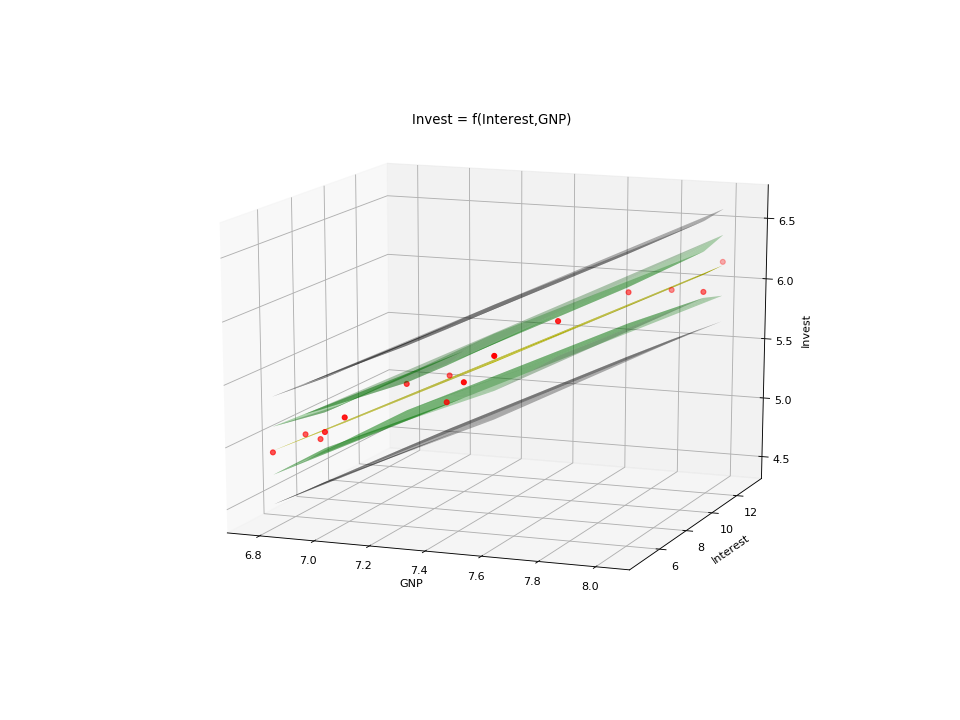

Text(0.5,0,'Invest')

In [37]:
#Allez, on retrousse ses manches, et on essaye de ploter un truc en 3D qui ressemble à quelque chose...
%matplotlib notebook
#Nos données basiques
X = df_invest["gnp"].apply(lambda x:np.log(x))
Y = df_invest["interest"]
Z = df_invest["invest"].apply(lambda x:np.log(x))


#On ajoute également les données du plan de régression linéaire
X = df_invest["gnp"].apply(lambda x:np.log(x))
Y = df_invest["interest"]
Z_reg = X_mat2.dot(b2)

#De même on ajoute les intervalles de confiance
born_est = Q552*np.sqrt(np.sum((X_mat2.dot(inv_Gram2))*X_mat2,axis=1).reshape(n,1))*np.sqrt(var_eps_est2)
born_val = Q552*np.sqrt(1+np.sum((X_mat2.dot(inv_Gram2))*X_mat2,axis=1).reshape(n,1))*np.sqrt(var_eps_est2)
all_CI_inf = (X_mat2.dot(b2).reshape(n,1)-born_est).sum(axis=1)
all_CI_sup = (X_mat2.dot(b2).reshape(n,1)+born_est).sum(axis=1)

all_PI_inf = (X_mat2.dot(b2).reshape(n,1)-born_val).sum(axis=1)
all_PI_sup = (X_mat2.dot(b2).reshape(n,1)+born_val).sum(axis=1)


fig = plt.figure(figsize=(12,9))
ax = fig.gca(projection='3d')
ax.scatter3D(X, Y, Z, color = "r", marker = "o", label="Real Invest")
ax.plot_trisurf(X, Y, Z_reg, color = "y", label="Linear Regression")
ax.plot_trisurf(X, Y, all_CI_inf, color = "g", label = "CI interval", alpha = 0.3)
ax.plot_trisurf(X, Y, all_PI_inf, color = "black", label = "PI interval", alpha = 0.3)
ax.plot_trisurf(X, Y, all_CI_sup, color = "g", alpha = 0.3)
ax.plot_trisurf(X, Y, all_PI_sup, color = "black", alpha = 0.3)
ax.set_title("Invest = f(Interest,GNP)")
ax.set_xlabel("GNP")
ax.set_ylabel("Interest")
ax.set_zlabel("Invest")




#### Question 13

In [ ]:
#On utilise maintenant la librairie Sklearn pour établir notre modèle linéaire
model=linear_model.LinearRegression(fit_intercept=False).fit(X_mat2,y_log)
y_model_pred2=model.predict(X_new2.reshape(1,3))[0]
print('       | Modele construit  |  Sklearn  |')
print('-----------------------------------')
print(f"b0     |       {round(b2_0,2)}       |   {round(model.coef_[0],2)}   |")
print(f"b1     |       {round(b2_1,2)}        |   {round(model.coef_[1],2)}    |")
print(f"b2     |       {round(b2_2,4)}     |   {round(model.coef_[2],4)} |")
print(f"R2     |       {round(new_R2,3)}       |   {round(model.score(X_mat2,y_log),3)}   |")
print(f"y_pred |       {round(float(Y_new2),2)}        |   {round(y_model_pred2,2)}    |")
print("\n On est très content de constater que les résultats sont similaires ! Encore une fois !")

In [ ]:
all_CI_inf